# Project Goal 
> - To predict what percentage of a Teams overall budget will be paid to the quarterback

# Project Description
> - Using data aquired from various websites we ran correlation tests to find the most statistically significant features

# Initial Hypothesis
> - Players who extend the season of their team I.E playoffs will have a higher percentage of their teams salary cap
> - Players who have more yards and touchdowns will have a higher percentage of their teams salary cap
> - Players who have more interceptions will have a lower percentage of their teams salary cap
> - Players who have a higher passer rating will have a higher percentage of their teams salary cap

# Imports

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor
import wrangle
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from pydataset import data
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('final_df.csv',index_col=[0])

In [3]:
df.head()

,team,time_to_throw,avg_comp_air_yds,avg_att_air_yards,avg_air_yard_diff,aggressive,lon_comp_air_dist,air_yds_to_sticks,pass_att,total_yds,...,completion_pct,exp_completion_pct,completion_pct_abv_exp,year,first_round,div_round,conf_champ,superbowl,won_superbowl,percent_of_cap
name,,,,,,,,,,,,,,,,,,,,,
Aaron Rodgers,GB,2.87,6.3,9.2,-3.0,16.4,60.8,0.8,610.0,4428.0,...,65.7,62.2,3.5,2016,1.0,1.0,1.0,0.0,0.0,17.9
Aaron Rodgers,GB,2.65,5.0,7.0,-1.9,14.7,48.3,-1.4,238.0,1675.0,...,64.7,66.9,-2.2,2017,0.0,0.0,0.0,0.0,0.0,17.9
Aaron Rodgers,GB,2.95,6.0,8.8,-2.8,13.7,61.4,-0.2,597.0,4442.0,...,62.3,63.5,-1.1,2018,0.0,0.0,0.0,0.0,0.0,18.9
Aaron Rodgers,GB,2.88,5.4,8.9,-3.6,14.2,54.9,0.1,569.0,4002.0,...,62.0,63.8,-1.7,2019,0.0,1.0,1.0,0.0,0.0,18.9
Aaron Rodgers,GB,2.72,5.5,8.1,-2.6,11.2,60.3,-0.4,526.0,4299.0,...,70.7,66.4,4.4,2020,0.0,1.0,1.0,0.0,0.0,18.9


In [4]:
train, validate, test = wrangle.split_data(df)

columns_list = df.select_dtypes(exclude=['object']).columns.to_list()

list_to_remove = ['conf_champ','avg_att_air_yards','avg_air_yard_diff','time_to_throw','air_yds_to_sticks','won_superbowl',
'avg_comp_air_yds','superbowl','year']

for i in list_to_remove:
    if i in columns_list:
        columns_list.remove(i)

        
target = columns_list.pop(len(columns_list) -1 )
corr_test = wrangle.correlation_tests(train, columns_list + list_to_remove , target).reset_index().drop(columns = 'index')

# Univariate Analysis

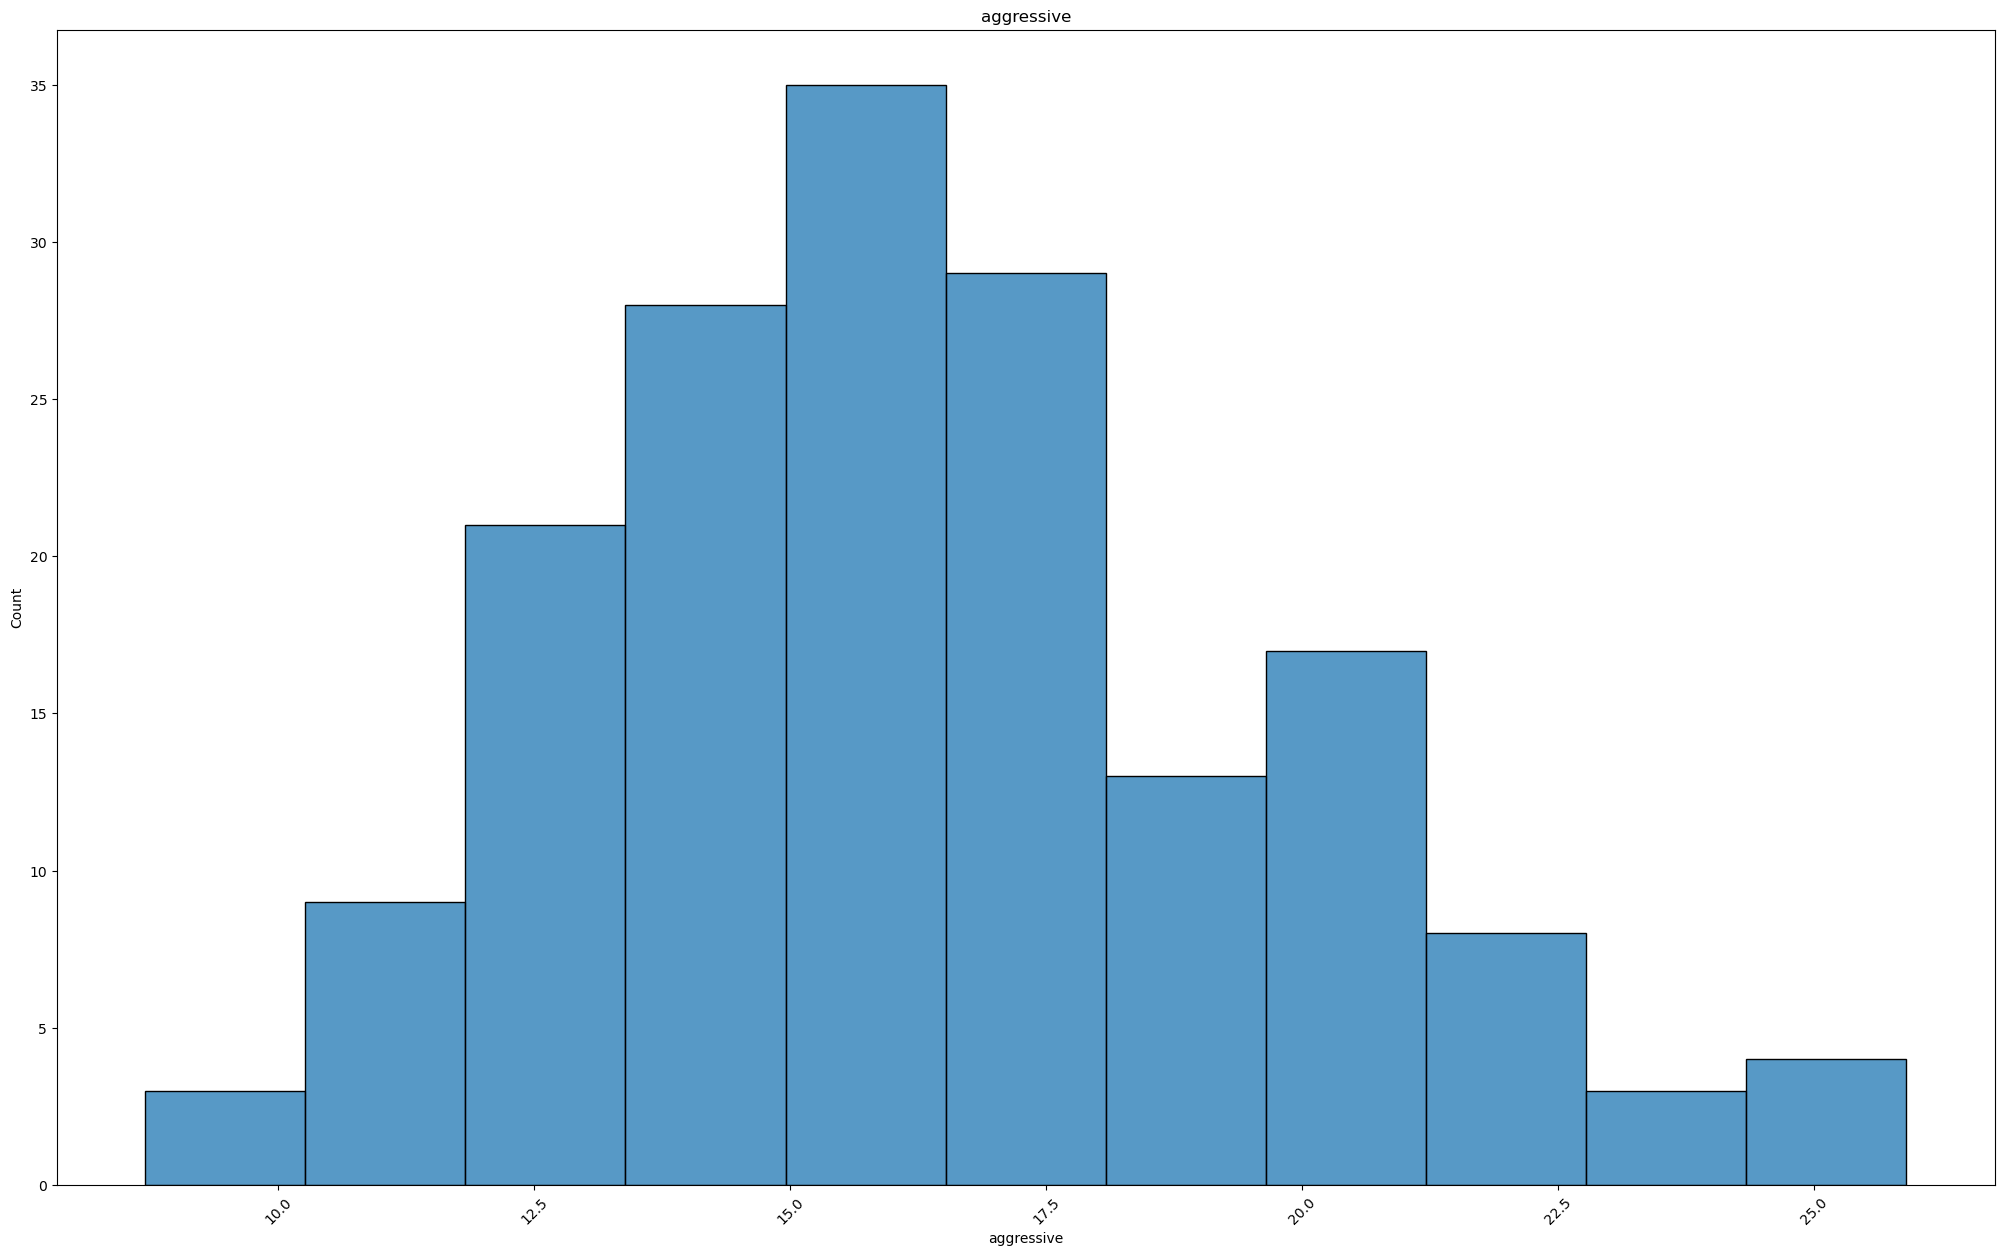

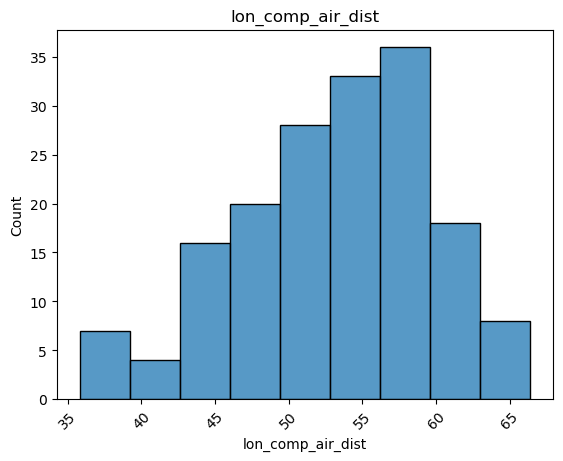

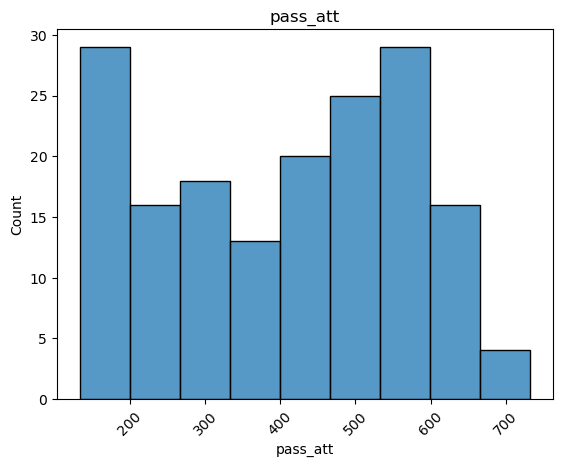

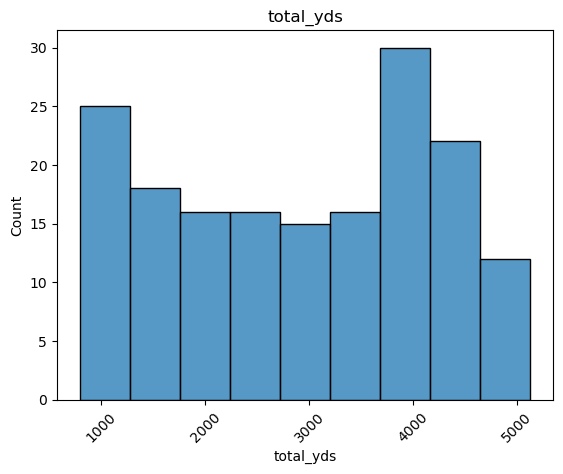

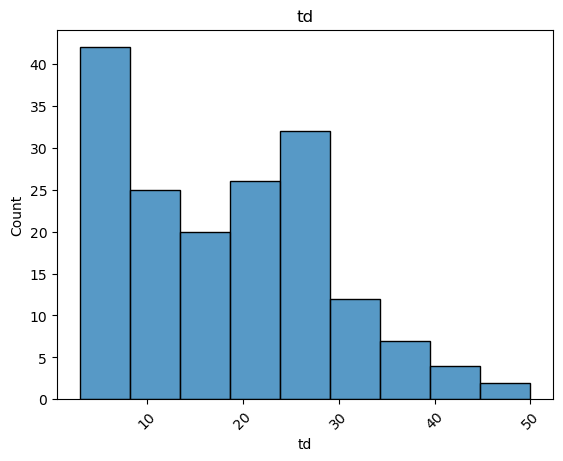

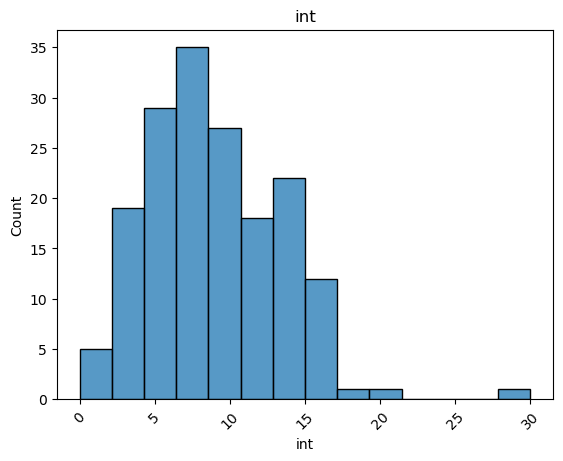

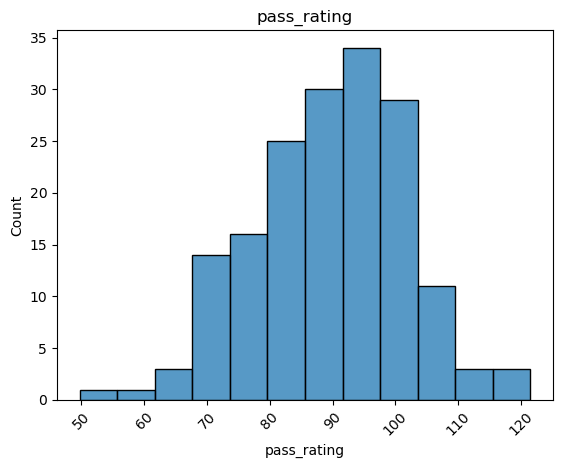

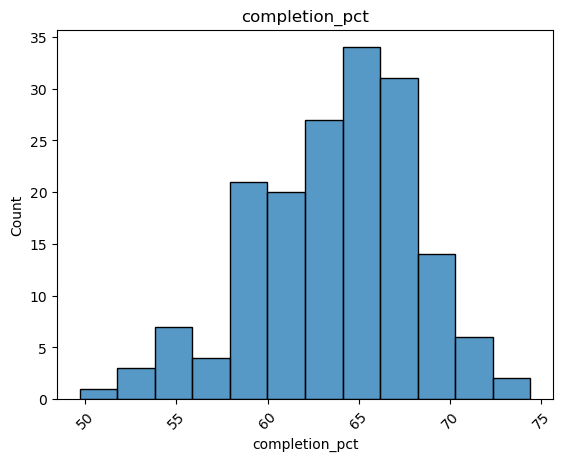

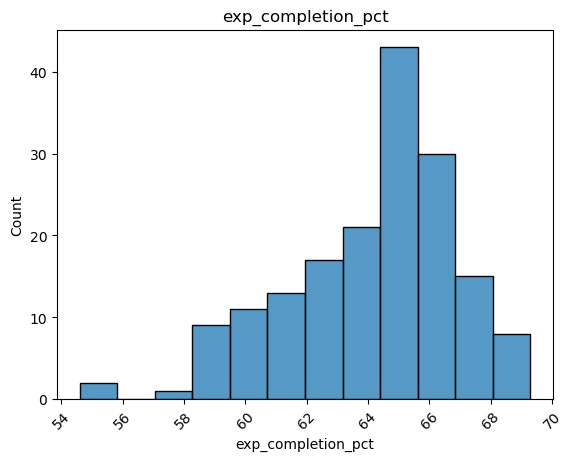

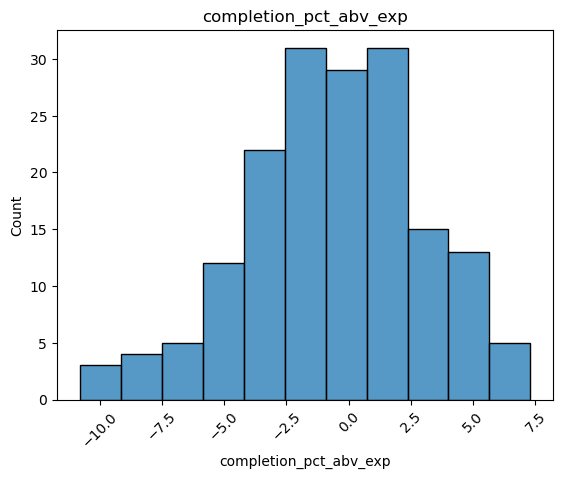

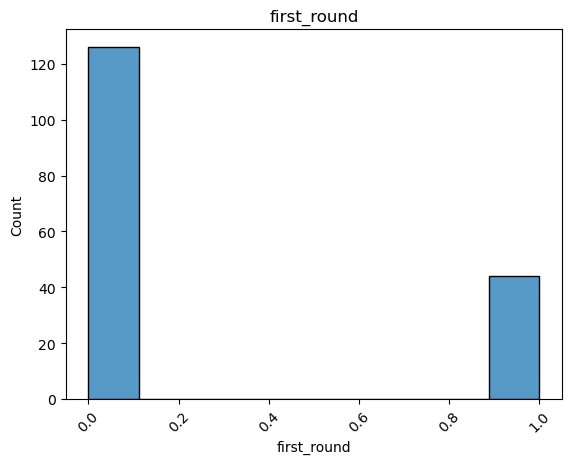

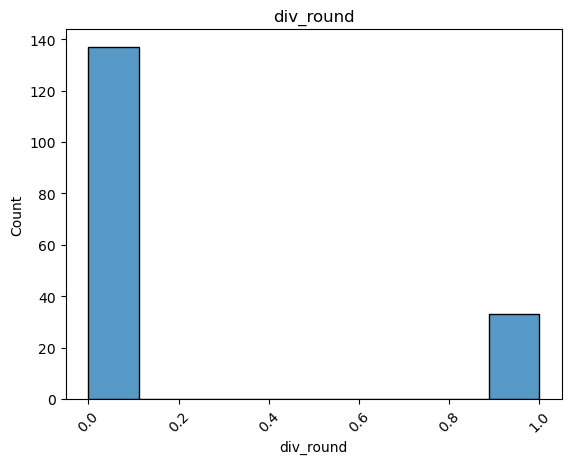

In [5]:
wrangle.univariate_visual(train[columns_list])

# Univariate Exploration Summary
> - Most of the data in the dataset were normally distributed

# Bivariate Analysis

$H_0$: There is no correlation between our selected features and our target variable.

$H_\alpha$: There is a correlation between our selected features and our target variable.

$\alpha$: 0.05

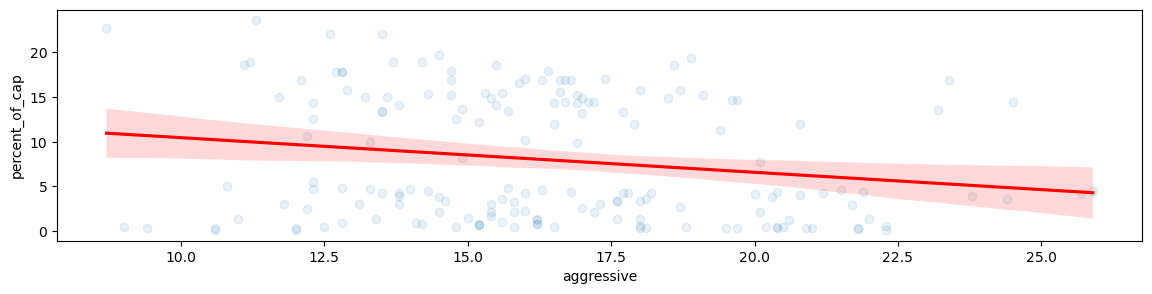

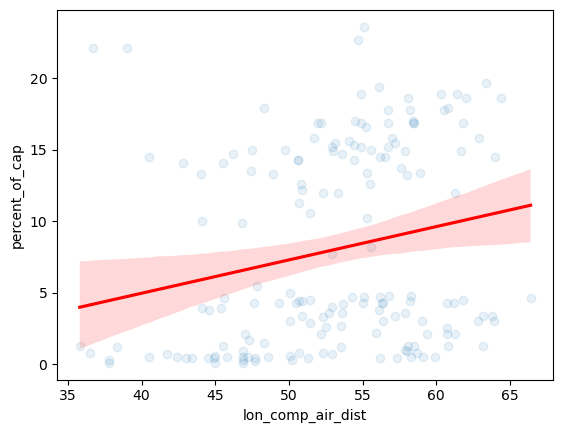

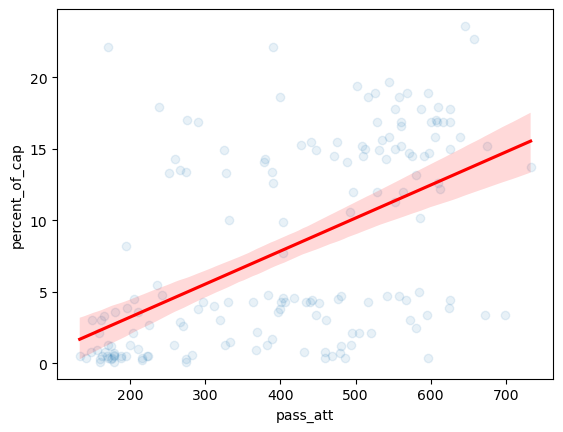

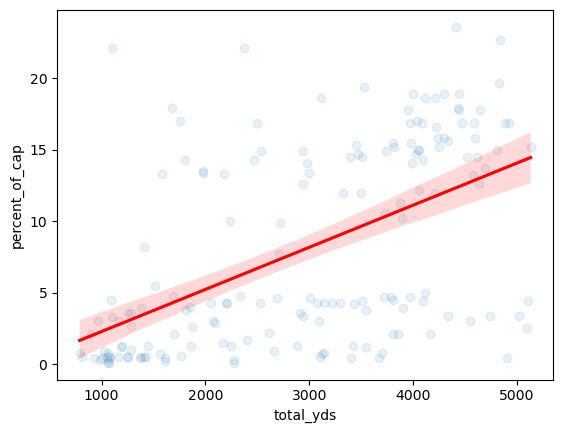

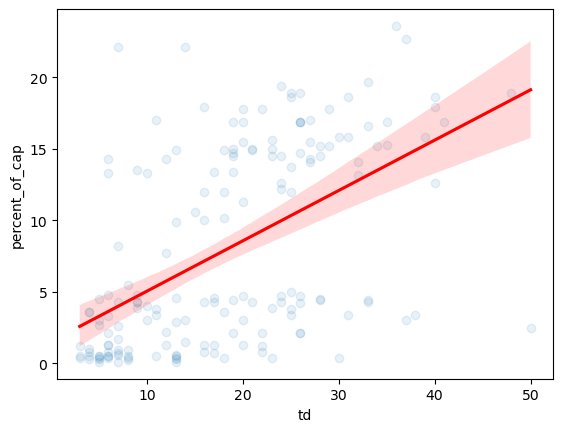

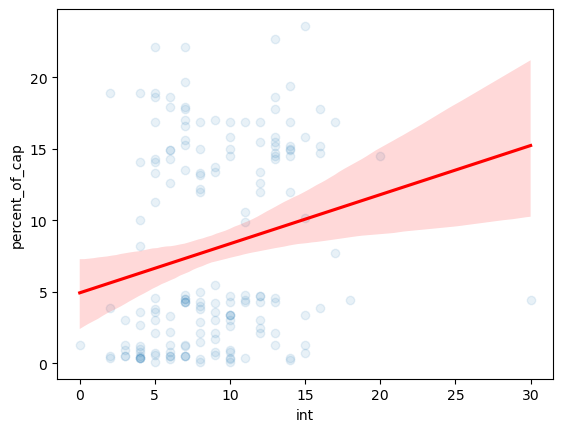

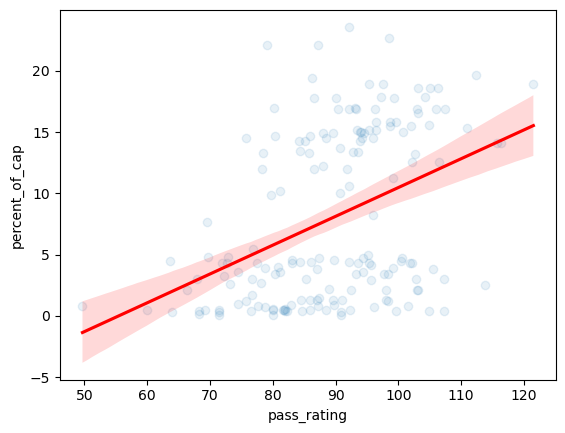

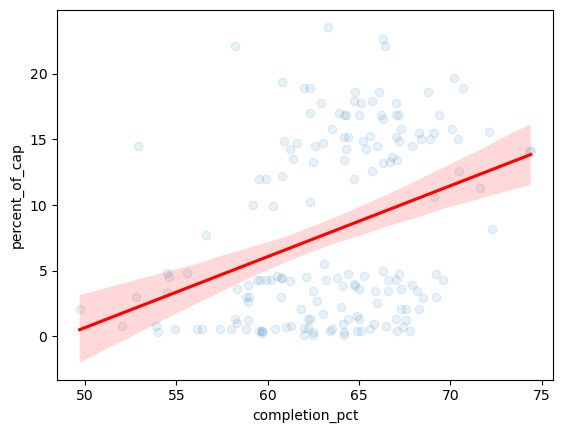

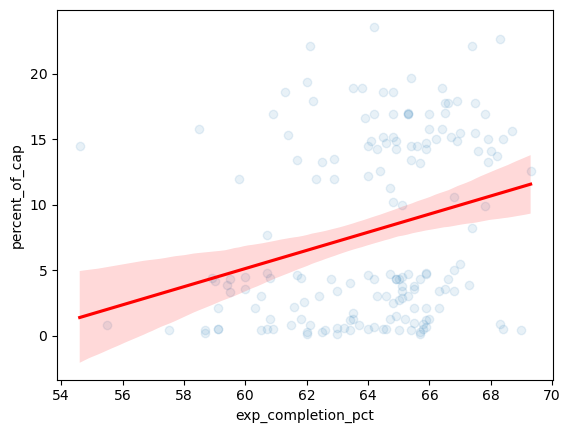

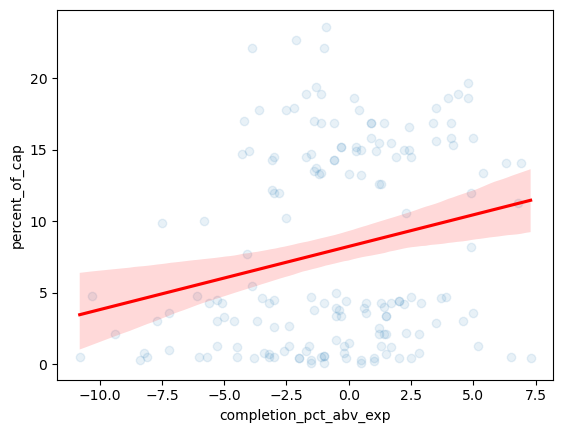

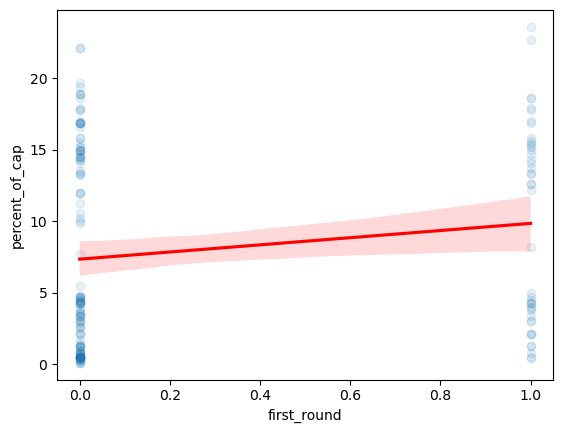

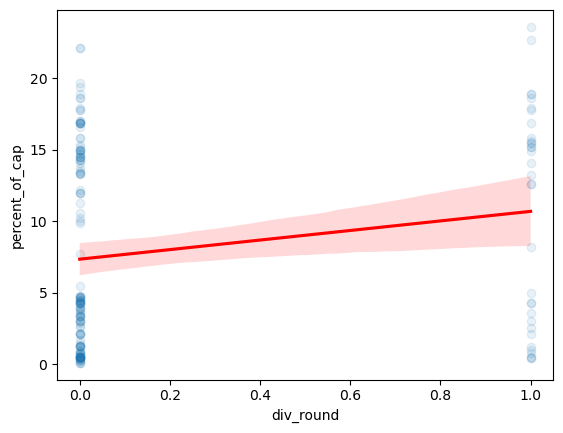

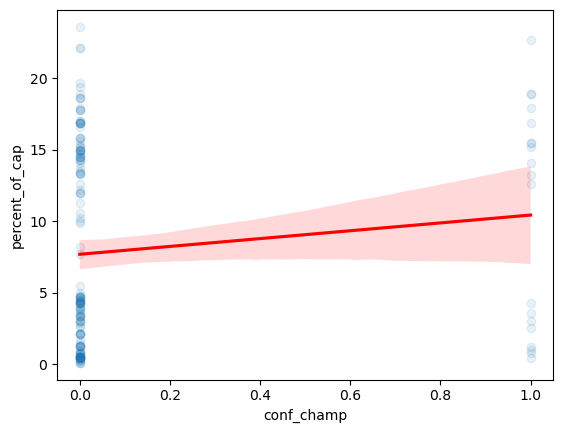

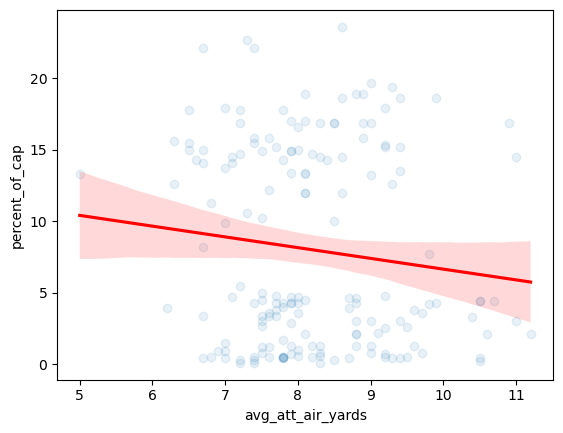

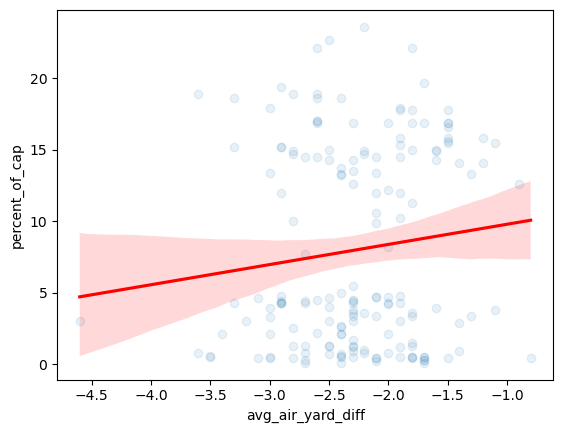

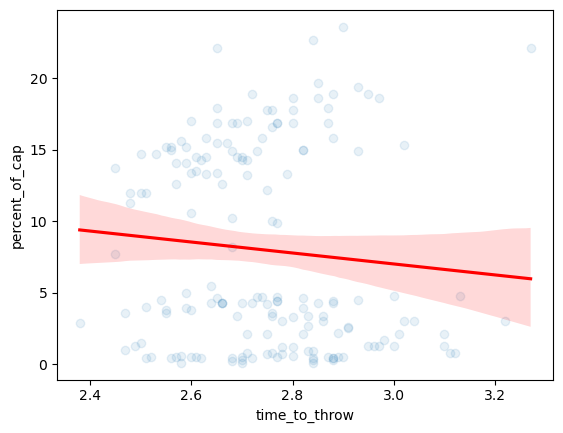

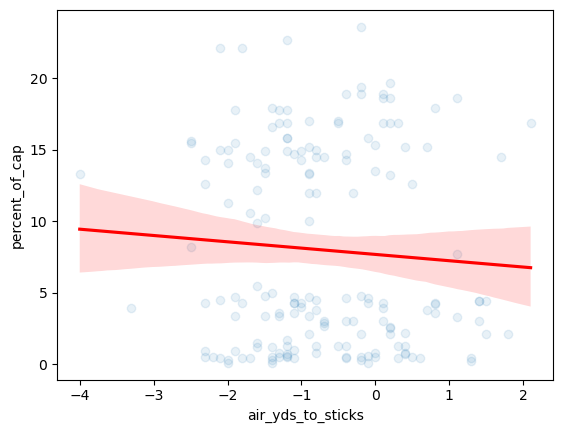

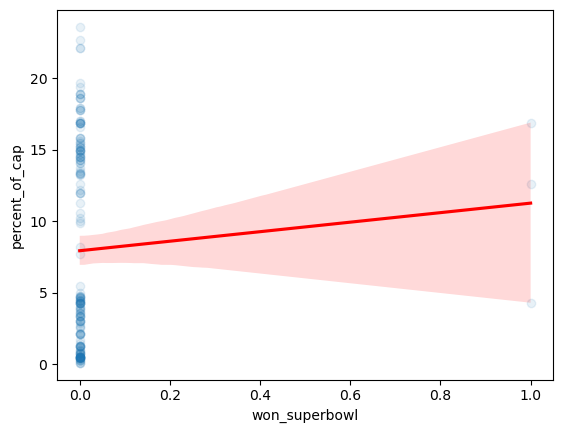

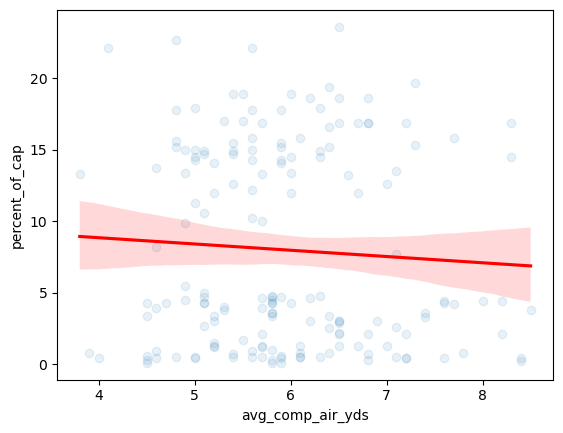

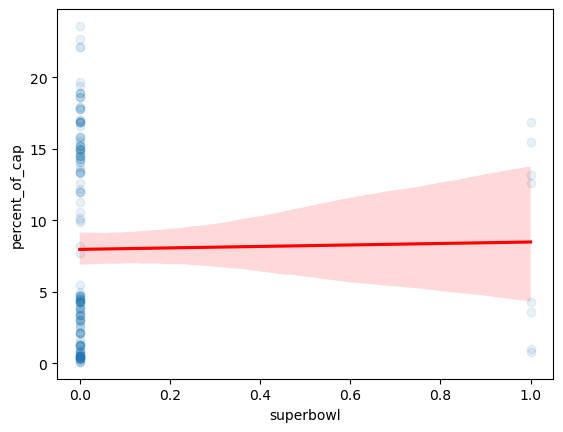

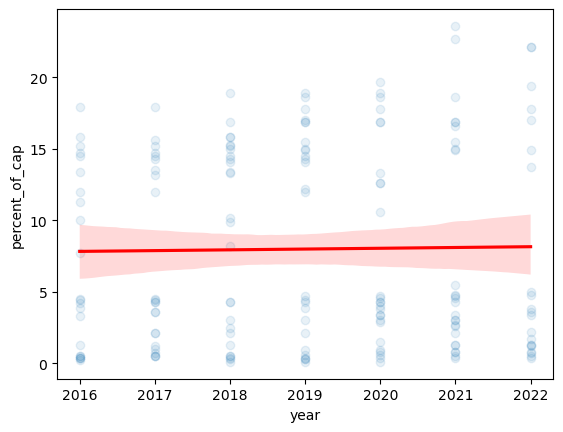

In [6]:
wrangle.correlation_charts(train,columns_list + list_to_remove, target)

# Bivariate Exploration Summary


In [7]:
wrangle.get_explore_data(columns_list, list_to_remove, corr_test)

,Features,Correlation,Moving Forward
0,aggressive,Positive,Yes
1,lon_comp_air_dist,Positive,Yes
2,pass_att,Positive,Yes
3,total_yds,Positive,Yes
4,td,Positive,Yes
5,int,Positive,Yes
6,pass_rating,Positive,Yes
7,completion_pct,Positive,Yes
8,exp_completion_pct,Positive,Yes
9,completion_pct_abv_exp,Positive,Yes


# Correlation Tests

> - We will use a confidence interval of 95%
> - the resulting alpha is .05

$H_0$: There is no statistical significance between our selected features and our target variable.

$H_\alpha$: There is a statistical significance between our selected features and our target variable.

$\alpha$: 0.05

In [44]:
corr_test[corr_test.p < .05].reset_index().drop(columns ='index')

,feature,r,p,target
0,total_yds,0.544151,1.729665e-14,percent_of_cap
1,pass_att,0.543016,2.007672e-14,percent_of_cap
2,td,0.533725,6.665897e-14,percent_of_cap
3,pass_rating,0.410384,2.727552e-08,percent_of_cap
4,completion_pct,0.349275,3.037556e-06,percent_of_cap
5,exp_completion_pct,0.274073,2.984785e-04,percent_of_cap
6,completion_pct_abv_exp,0.227828,2.808117e-03,percent_of_cap
7,lon_comp_air_dist,0.220230,3.904487e-03,percent_of_cap
8,int,0.209845,6.023370e-03,percent_of_cap
9,div_round,0.191376,1.242001e-02,percent_of_cap


# Correlation Tests summary
p value was greater than alpha for:
> - year
> - superbowl
> - avg_comp_air_yds
> - won_superbowl
> - air_yds_to_sticks
> - time_to_throw
> - avg_air_yard_diff
> - avg_att_air_yards
> - conf_champ

# Modeling

- We will use RMSE as our evaluation metric

** by using baseline as an evaluation metric we can be accurate to within 6.9 <br>
** 6.9 will be the baseline RMSE we will use for this project <br>
<br>
** I will be evaluating models developed using four different model types and various hyperparameter configurations * Models will be evaluated on train and validate data * The model that performs the best will then be evaluated on test data

## Features we are moving forward with
> - total_yds
> - pass_att
> - td
> - pass_rating
> - completion_pct
> - exp_completion_pct
> - completion_pct_abv_exp
> - lon_comp_air_dist
> - int
> - div_round
> - aggressive
> - first_round

In [9]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.get_X_train_val_test(train,validate, test, columns_list,target)

### Scaling on selected features to be sent into model

In [10]:
X_train, X_validate, X_test = wrangle.scale_data(X_train, X_validate,X_test,cols = columns_list)

### Running the data through the models

In [12]:
df1, df2, df3 = wrangle.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

## Train Data

In [13]:
df1

,model_train,rmse,r2
0,baseline,6.913004,0.000000
1,ordinary least squared(OLS),5.546699,0.356223
2,lasso lars(lars),6.723182,0.054163
3,Polynomial Regression(poly2),4.034091,0.659468
4,Generalized Linear Model (GLM),5.723051,0.314636


## Validate Data

In [14]:
df2

,model_validate,rmse,r2
0,baseline,6.913004,0.000000
1,ordinary least squared(OLS),6.990682,0.040179
2,lasso lars(lars),7.246532,-0.031363
3,Polynomial Regression(poly2),9.551414,-0.791788
4,Generalized Linear Model (GLM),6.798063,0.092343


## Test Data

In [15]:
df3.iloc[1].reset_index()

,index,1
0,model_validate,ordinary least squared(OLS)
1,rmse,5.483046
2,r2,0.371102


# Modeling Summary
> - Our ordinary least squared(OLS) performed best with an RMSE score of 6.911341e+00 in validate
> - Our unseen test data beat baseline by 1.5 RMSE

# Conclusion

> - Most of the data in the dataset were normally distributed


### Features that were statistically significant
> - total_yds
> - pass_att
> - td
> - pass_rating
> - completion_pct
> - exp_completion_pct
> - completion_pct_abv_exp
> - lon_comp_air_dist
> - int
> - div_round
> - aggressive
> - first_round
### Best model
> - ordinary least squared(OLS) performed best with an RMSE score of 6.911341e+00 in validate

# Recommendations
> - Because our model was able to beat baseline we recommend using our model



# Next Steps
> - Run through the entire pipeline with more data scraped from different websites
> - Run throught the entire pipeline with different positons other than just quarterback